# Exercise

Use the code in this notebook to complete the following exercises:

1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    
 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


<AxesSubplot:xlabel='time', ylabel='x'>

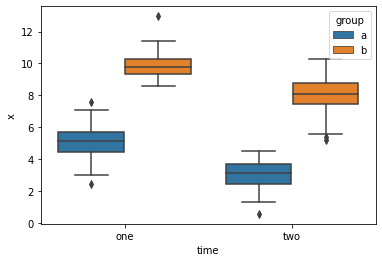

In [53]:
sns.boxplot(x = 'time', y = 'x', data = df1, hue = 'group')

In [21]:
alpha = 0.05

In [37]:
#Two Sample, Two Tailed TTest
# make a subset 
x1 = df1[df1.time == 'one'].x
x2 = df1[df1.time == 'two'].x


# run a 2 sample, t-test
t_stat, p = stats.ttest_ind(x1,x2, equal_var = True)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is no significant difference in means for time one and time two.'

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = -5.4439
p_value = 0.0000

We can reject the null hypothesis that There is no significant difference in means for time one and time two.


In [38]:
#Two Sample, Two Tailed TTest
# make a subset 
x1 = df1[df1.group == 'a'].x
x2 = df1[df1.group == 'b'].x


# run a 2 sample, t-test
t_stat, p = stats.ttest_ind(x1,x2, equal_var =True)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is no significant difference in means for group a and group b.'

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = -19.9819
p_value = 0.0000

We can reject the null hypothesis that There is no significant difference in means for group a and group b.


 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   group   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [32]:
df2.describe()

,x,y
count,200.000000,200.000000
mean,99.980573,606.099784
std,7.753863,26.958585
min,84.542520,542.096437
25%,93.056095,586.579382
50%,100.095115,599.022923
75%,107.320842,629.098231
max,114.606179,665.250458


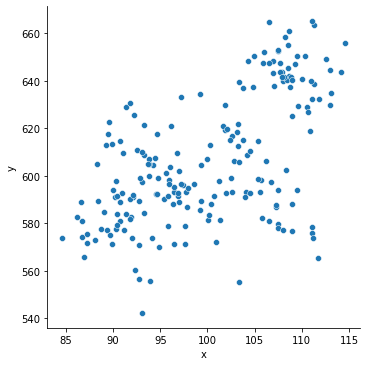

In [34]:
sns.relplot(x = 'x', y = 'y', data = df2, col = 'group')

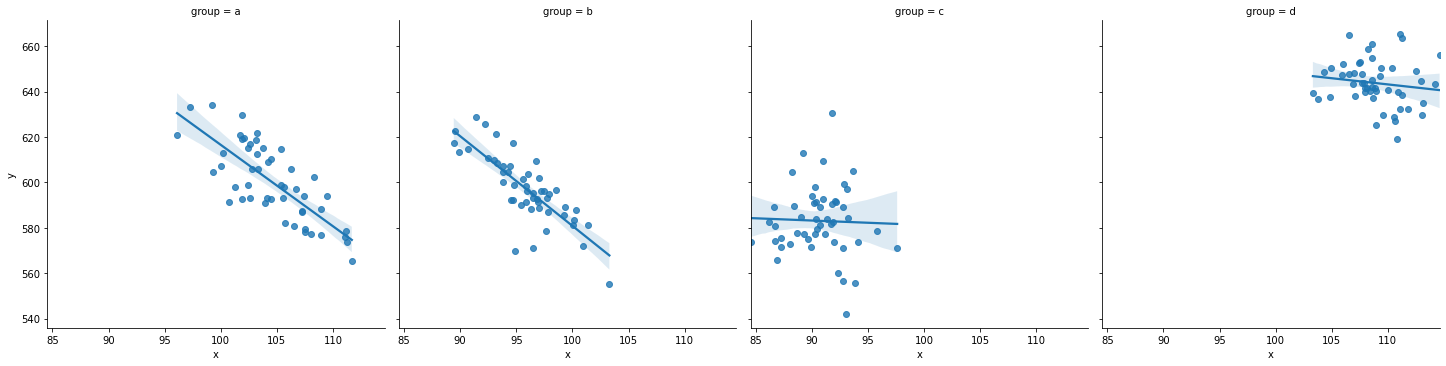

In [55]:
sns.lmplot(x = 'x', y = 'y', data = df2,col = 'group')

 Pearson correlation coefficient is 0.5693902765694359, the corresponding p value is 1.3960403186191819e-18.
 We reject the null, and accept HA: there is a linear correlation between x and y


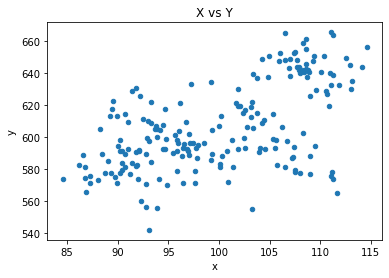

In [41]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between x and y'

alpha = 0.05

corr, p = stats.pearsonr(df2.x, df2.y)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


df2.plot.scatter('x', 'y')
plt.title('X vs Y')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a linear correlation between x and y')
else:
    print(f' We accept null,  {Hypothesis_null}.')

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   surgeon  1000 non-null   object
 1   surgery  1000 non-null   object
 2   success  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [43]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [49]:
df3[df3.surgeon == "A"].success.value_counts()

1    421
0     59
Name: success, dtype: int64

In [54]:
421 / (421 +59)

0.8770833333333333

In [51]:
df3[df3.surgeon == "B"].success.value_counts()

1    376
0    144
Name: success, dtype: int64

In [52]:
376 / (376 + 144)

0.7230769230769231